In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import cycle
from sympy import *
import scipy
from scipy.special import lambertw as W

In [2]:
# Per Simulation
X = [0.8, 1.2, 3] # Robot Travel Distances

s = 5 # Minimum Gear Ratio (5)
b = 25 # Maximum Gear Ratio (25)

In [3]:
# Robot Constants
r = 0.051 # Wheel Radius (meters)
m = 13 # Robot Mass (Kg)
I = 0.0015 # Rotational Inertia of drive system (Kg m^2)
E = 1 # Efficiency of wheel (Tank Drive = 1, Mecanum Drive = 0.7)
Vo = 12.5 # Battery Voltage (volts)
Rb = 0.15 # Battery internal resistance (ohms)

# Motor Constants
Vm = 12 # Nominal Motor Voltage
Ts = 2.1 / 20 # Stall torque (Nm)
wo = 5 * 20 # No load speed (Radians / Sec)
Io = 0.4 # No load current (Amps)
Is = 8.5 # Stall current (Amps)

nm = 4 # Number of motors

In [4]:
# Motor Constants
Km = Ts / Is
Ke = Vo / wo
Tf = Ts * Io / Is * nm
R = Rb + Vm / Is / nm

In [5]:
# Equation constants
c1 = (Vo*Km/R - Tf) / (r**2*m + I*E)
c2 = Ke*Km / (2*math.pi*r*R * (r**2 * m + I*E))

In [6]:
def timeAtRatio(g, x):
    u = float(exp(-g**3*x*c2**2/c1) * g*c2/c1)
    time = (W(u) / c2*g**2 + c2*g*x/c1)
    return float(time)

In [7]:
def loopTimeAtRatio(g, targetDist):
    x, v, t = 0. , 0., 0.
    dt = 0.001
    while x < targetDist:
        a = g*c1 - g**2*v*c2
        v = v + a*dt
        x = x + v*dt
        t = t + dt
    return t

In [11]:
len(x_g)

900

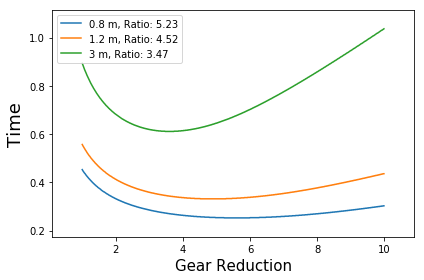

In [13]:
x_g = np.arange(1, 10, 0.01)
y_t = np.zeros(((10-1)*100))

fig = plt.figure()
ax = fig.add_subplot(111)

for j, x in enumerate(X):
    
    y_t = [loopTimeAtRatio(g, x) for g in x_g]
        
    ax.plot(x_g, y_t, label = str(X[j]) + " m, Ratio: " + str(round(x_g[np.argmin(y_t)], 3)))

ax.set_xlabel("Gear Reduction", fontsize=15)
ax.set_ylabel("Time", fontsize=18)

ax.legend(loc="best")

ax.margins(0.1)
fig.tight_layout()

plt.show()

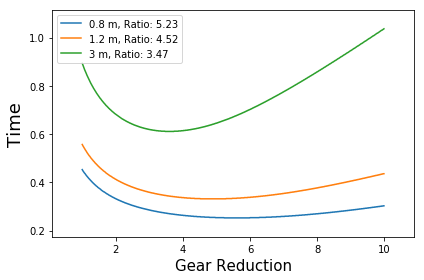

In [14]:
x_g = np.arange(1, 10, 0.01)
y_t = np.zeros(((10-1)*100))

fig = plt.figure()
ax = fig.add_subplot(111)

for j, x in enumerate(X):
    for i, g in np.ndenumerate(x_g):
        y_t[i] = loopTimeAtRatio(g, x)
        
    ax.plot(x_g, y_t, label = str(X[j]) + " m, Ratio: " + str(round(x_g[np.argmin(y_t)], 3)))

ax.set_xlabel("Gear Reduction", fontsize=15)
ax.set_ylabel("Time", fontsize=18)

ax.legend(loc="best")

ax.margins(0.1)
fig.tight_layout()

plt.show()

In [127]:
x_g[np.argmin(y_t)]

5.230000000000004